#   A PROJECT ON -- :  Sentiment Analysis on Customer Reviews of Fastrack Watches

# 

#                                   Objective

###### The objective of a project on sentiment analysis of customer reviews of watches is to extract meaningful insights and sentiment from customer reviews related to watches. The project aims to use natural language processing techniques and deep learning algorithms to analyze customer reviews and determine the sentiment behind them.




# Problem Statement

###### The problem statement for sentiment analysis of customer reviews of watches is to identify and analyze the sentiment behind customer reviews ..

# About Dataset

###### Here I scrape customer review data from Flipkart using a data mining tool for sentiment analysis of customer reviews on Fastrack watches

# Methodology/Approach

###### In this project we will do following processes:-

1.Exploratory Data Analysis

2.Text Cleaning and KeyWord Extraction

3.Model Building and Evaluation

4.Predictive System
 

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


In [8]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
from textblob import Word
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_json(r'C:\Users\Utkarsh Sharma\Desktop\data scrapp\flipkart_final_Json.json')
df1=pd.read_json(r'C:\Users\Utkarsh Sharma\Desktop\data scrapp\json_data1.json')
df2=pd.read_json(r'C:\Users\Utkarsh Sharma\Desktop\data scrapp\json_data3.json')

In [10]:
#concatenate all the dataframes 
watch_df=pd.concat([df,df1,df2])

In [11]:
# Check the shape of the data
print("Shape of the data:", watch_df.shape)

Shape of the data: (9088, 5)


In [12]:
# Check the first few rows of the data
watch_df.head()

Customer Name Review Title  \
0      Sagufta Patel                
1   Nisreen  Hussain                
2  Maneetha P Mathew                
3  Flipkart Customer                
4      Anjana Bansal                

                                  Review description Review Date  Rating star  
0  5|amazing watch at a great price.... packaging...   Jul, 2019            5  
1  5|i like d watch very nice nd delivery boy is ...   Jun, 2019            5  
2  5|I really like big dials eventhough my parent...   Jun, 2019            5  
3  5|Very nice watch. Nice comfortable! and fast ...   Jun, 2019            5  
4  5|This Wrist watch is lit 🔥 🔥 🔥.  Just loved t...   Jun, 2019            5

In [13]:
# Check the data types of the columns
print(watch_df.dtypes)

Customer Name         object
Review Title          object
Review description    object
Review Date           object
Rating star            int64
dtype: object


In [14]:
# Check for missing values
print(watch_df.isnull().sum())


Customer Name         0
Review Title          0
Review description    0
Review Date           0
Rating star           0
dtype: int64


In [15]:
#make new column of sentiments(positive or negative) using polarity
def form_sentiments(data):
    text=TextBlob(data)
    sentiments=text.sentiment.polarity
    if sentiments>=0.1:
        result='Positive'
    else :
        result='Negative'
    return result

In [16]:
watch_df['Sentiment']=watch_df['Review description'].apply(form_sentiments)


In [17]:
watch_df.head()


Customer Name Review Title  \
0      Sagufta Patel                
1   Nisreen  Hussain                
2  Maneetha P Mathew                
3  Flipkart Customer                
4      Anjana Bansal                

                                  Review description Review Date  Rating star  \
0  5|amazing watch at a great price.... packaging...   Jul, 2019            5   
1  5|i like d watch very nice nd delivery boy is ...   Jun, 2019            5   
2  5|I really like big dials eventhough my parent...   Jun, 2019            5   
3  5|Very nice watch. Nice comfortable! and fast ...   Jun, 2019            5   
4  5|This Wrist watch is lit 🔥 🔥 🔥.  Just loved t...   Jun, 2019            5   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

# Data Preprocessing

In [18]:
watch_df['Sentiment'].value_counts()

Negative    5395
Positive    3693
Name: Sentiment, dtype: int64

In [19]:
# Check for duplicates
watch_df.duplicated().value_counts()

False    7035
True     2053
dtype: int64

In [20]:
# now drop the duplicate values
watch_df.drop_duplicates(keep='first',inplace=True)

In [21]:
# Check the shape of the data
print("Shape of the data:", watch_df.shape)

Shape of the data: (7035, 6)


In [22]:
watch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7035 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Name       7035 non-null   object
 1   Review Title        7035 non-null   object
 2   Review description  7035 non-null   object
 3   Review Date         7035 non-null   object
 4   Rating star         7035 non-null   int64 
 5   Sentiment           7035 non-null   object
dtypes: int64(1), object(5)
memory usage: 384.7+ KB


In [23]:
new_df=watch_df.copy()
new_df=watch_df[['Review description','Sentiment']]
new_df.head()

Review description Sentiment
0  5|amazing watch at a great price.... packaging...  Positive
1  5|i like d watch very nice nd delivery boy is ...  Positive
2  5|I really like big dials eventhough my parent...  Positive
3  5|Very nice watch. Nice comfortable! and fast ...  Positive
4  5|This Wrist watch is lit 🔥 🔥 🔥.  Just loved t...  Positive

In [24]:
new_df['Review description']=new_df['Review description'].str.slice(start=2)

In [25]:
new_df.head()

Review description Sentiment
0  amazing watch at a great price.... packaging w...  Positive
1  i like d watch very nice nd delivery boy is al...  Positive
2  I really like big dials eventhough my parents ...  Positive
3  Very nice watch. Nice comfortable! and fast de...  Positive
4  This Wrist watch is lit 🔥 🔥 🔥.  Just loved the...  Positive

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7035 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Review description  7035 non-null   object
 1   Sentiment           7035 non-null   object
dtypes: object(2)
memory usage: 164.9+ KB


# 1. EDA(Exploratory Data Analysis)

## Countplot

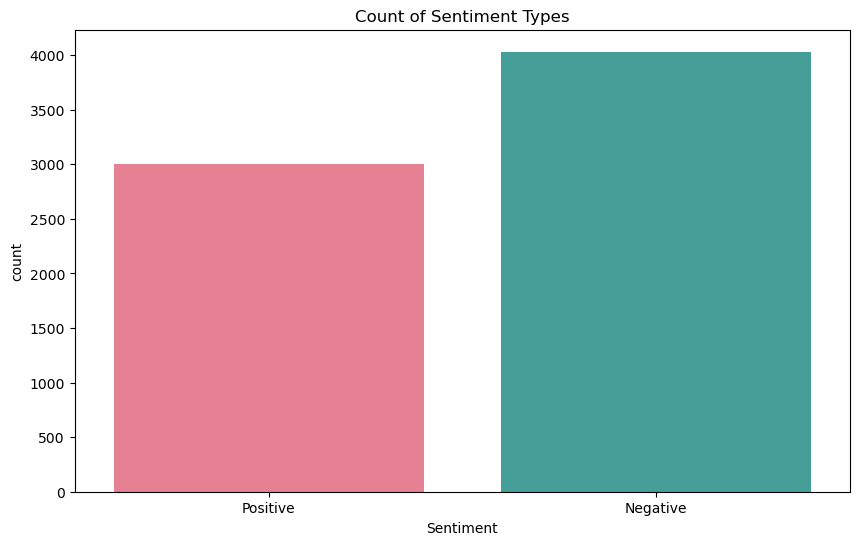

In [22]:
# Visual Representation of Value counts of Different Emotion
plt.figure(figsize=(10,6))
sns.countplot(new_df['Sentiment'],palette='husl')
plt.title("Count of Sentiment Types");
plt.savefig(r'C:\Users\Utkarsh Sharma\Downloads\figures\count.png',dpi=200)

In [116]:
new_df['Review description'].describe()

count     7035
unique    4834
top       Good
freq       315
Name: Review description, dtype: object

## Boxplot

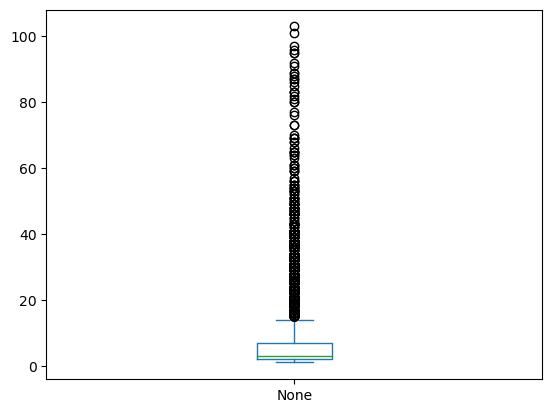

In [23]:
# Calculate reviews lengths
review_len = pd.Series([len(tweet.split()) for tweet in new_df['Review description']])

# The distribution of tweet text lengths
review_len.plot(kind='box')
plt.savefig(r'C:\Users\Utkarsh Sharma\Downloads\figures\box.png',dpi=200)

###### The box plot helps to understand the distribution of review lengths, which can be useful for identifying potential outliers and understanding the range and variability of review lengths in the dataset.

## #Plotting the distribution of text length for positive sentiment 

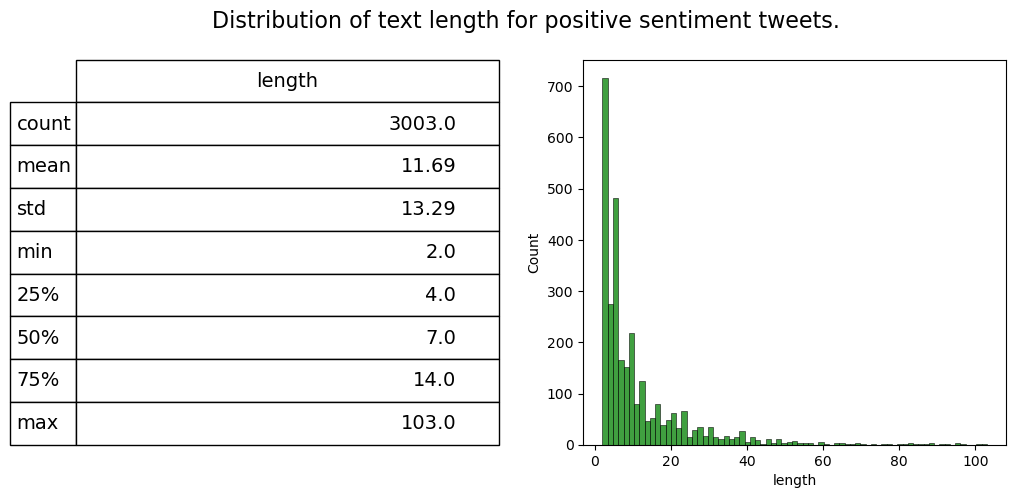

In [24]:


fig = plt.figure(figsize=(12,5))
new_df['length'] = new_df['Review description'].str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(new_df[new_df['Sentiment']=='Positive']['length'], ax=ax1,color='green')
describe = new_df.length[new_df.Sentiment=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.savefig(r'C:\Users\Utkarsh Sharma\Downloads\figures\positive.png',dpi=200)


###### this graph provides an informative visualization and summary statistics of the text length distribution for positive sentiment 

## Plotting the distribution of text length for Negative sentiment 

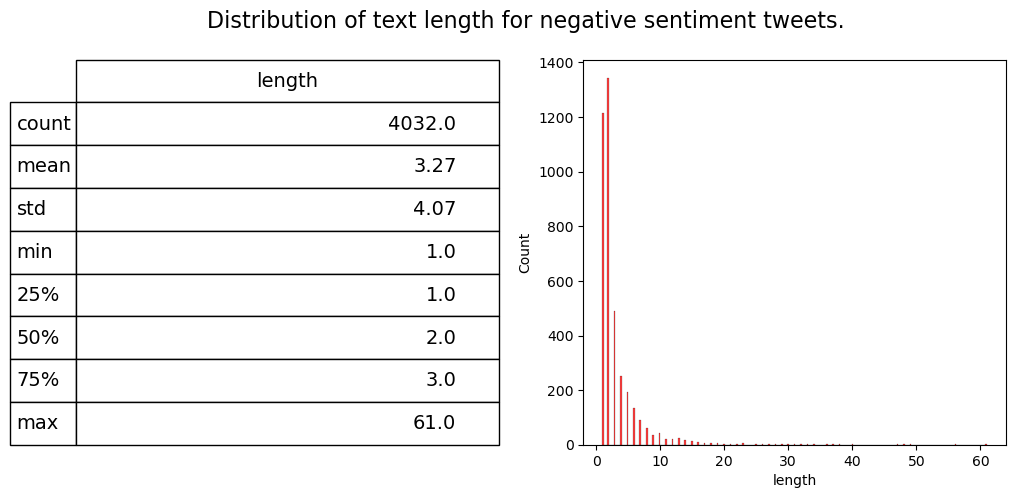

In [25]:


fig = plt.figure(figsize=(12,5))
new_df['length'] = new_df['Review description'].str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(new_df[new_df['Sentiment']=='Negative']['length'], ax=ax1,color='red')
describe = new_df.length[new_df.Sentiment=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)
plt.savefig(r'C:\Users\Utkarsh Sharma\Downloads\figures\neagtive.png',dpi=200)

plt.show()

###### this above graph provides an informative visualization and summary statistics of the text length distribution for negative sentiment 

## Pie Chart

In [27]:
#Plotting the Pie chart of the percentage of different sentiments

import plotly.express as px
fig = px.pie(new_df, names='Sentiment', title ='Pie chart of different sentiments')

fig.show()

###### The pie chart can help you understand the overall distribution of sentiment labels in your dataset

## WordCloud

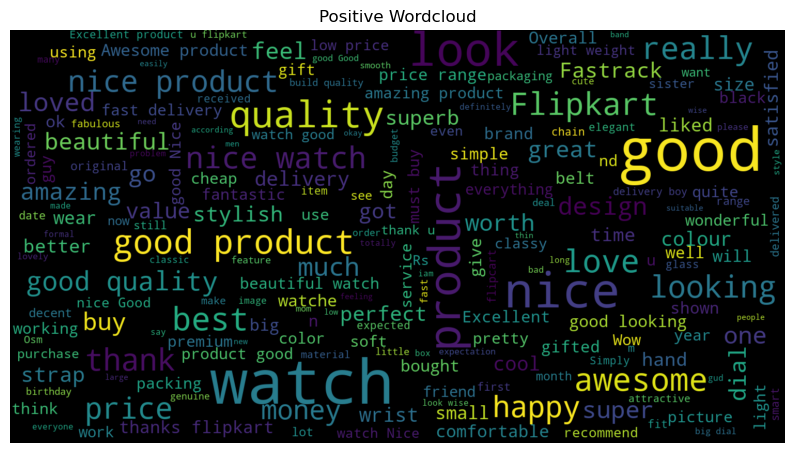

In [28]:
PositiveWords = pd.Series(' '.join(new_df[new_df['Sentiment']=='Positive']['Review description']).split())
Positive_cloud= WordCloud(width=1500, height=800, random_state= 21,min_font_size=15,max_font_size=119).generate(' '.join(PositiveWords))
plt.figure(figsize = (10,10))
plt.imshow(Positive_cloud,interpolation='bilinear')
plt.title("Positive Wordcloud")
plt.axis('off')
plt.savefig(r'C:\Users\Utkarsh Sharma\Downloads\figures\wc.png',dpi=200)

plt.show()

###### The resulting graph is a visual representation of the most common positive words found in the customer reviews dataset.

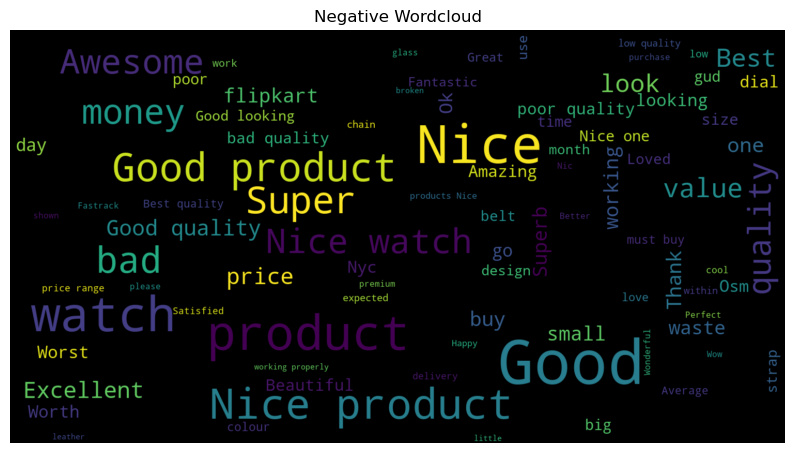

In [29]:
NegativeWords = pd.Series(' '.join(new_df[new_df['Sentiment']=='Negative']['Review description']).split())
Negative_cloud= WordCloud(width=1500, height=800, random_state= 21,min_font_size=15,max_font_size=119).generate(' '.join(NegativeWords))
plt.figure(figsize = (10,10))
plt.imshow(Negative_cloud,interpolation='bilinear')
plt.title("Negative Wordcloud")
plt.axis('off')
plt.savefig(r'C:\Users\Utkarsh Sharma\Downloads\figures\wc2.png',dpi=200)
plt.show()

###### The resulting graph is a visual representation of the most common negative words found in the customer reviews dataset.

# 2. Text Cleaning and Keyword Extraction

In [28]:
contractions = { 
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "i am",
"I've": "i have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"u":"you",
" ur ":" your ",
" n ":" and ",
'bout':'about',
"cn":"can",
"hve":"have"
}

In [29]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

### 1. Lowering the text & Contractions

In [30]:
new_df['Clean_Text'] = new_df['Review description'].apply(lambda x: x.lower())

new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x: cont_to_exp(x))

In [31]:
import unicodedata
def remove_accented_char(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

### 2.Remove accented char

In [32]:
new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x: remove_accented_char(x))

### 3.Remove Emails

In [33]:
new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x: re.sub(r'([a-zA-z0-9+._-]+@[a-zA-z0-9._-]+\.[a-zA-z0-9_-]+)','' , x))

### 4.Remove Punctuation

In [34]:
import string
string.punctuation

new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x : "".join(i for i in x if i not in string.punctuation))

### 5. Remove multiple spaces

In [35]:
new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x : " ".join(x.split()))

### 6..HTML TAGS removal

In [36]:
from bs4 import BeautifulSoup
new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x : BeautifulSoup(x,'lxml').get_text())

### 7.Remove Stopwords

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [38]:
allstopwords = stopwords.words('english')
new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x: ' '.join(x for x in x.split() if x not in allstopwords))

### 8. Remove all emojis

In [39]:
new_df['Clean_Text'] = new_df['Clean_Text'].apply(lambda x:x.encode('latin-1','ignore').decode('latin-1'))


In [40]:
new_df.head(10)

Review description Sentiment  \
0  amazing watch at a great price.... packaging w...  Positive   
1  i like d watch very nice nd delivery boy is al...  Positive   
2  I really like big dials eventhough my parents ...  Positive   
3  Very nice watch. Nice comfortable! and fast de...  Positive   
4  This Wrist watch is lit 🔥 🔥 🔥.  Just loved the...  Positive   
5  Amazing watch. I am not a watch lover but afte...  Positive   
6  It is a very good product.  Worth every penny....  Positive   
7  I liked it.. but the glass quality is poor, ot...  Positive   
8  It's a nice watch ,cool looking not too funky ...  Positive   
9  a cool and Aesthetic look it have....as well a...  Positive   

                                          Clean_Text  
0  amazing watch great price packaging well deliv...  
1  like watch nice nd delivery boy also hyoumble ...  
2  really like big dials eventhoyough parents wan...  
3  nice watch nice comfortable fast delivery flip...  
4  wrist watch lit jyoust loved prodyouct byouild...  
5  amazing watch watch lover byout byouying like ...  
6  good prodyouct worth every penny good deal you...  
7  liked byout glass qyouality poor otherwise str...  
8  nice watch cool looking fyounky classic feel w...  
9      cool aesthetic look haveas well stylish loved

# 3. Model Building & Evaluation

In [41]:
df=new_df[['Clean_Text','Sentiment']]

### Use Label Encoder to convert Sentiment into binary

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])
df.head()

Clean_Text  Sentiment
0  amazing watch great price packaging well deliv...          1
1  like watch nice nd delivery boy also hyoumble ...          1
2  really like big dials eventhoyough parents wan...          1
3  nice watch nice comfortable fast delivery flip...          1
4  wrist watch lit jyoust loved prodyouct byouild...          1

In [44]:
from tensorflow.keras.callbacks import EarlyStopping



In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM,GRU,Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE
from keras.layers import Dropout

In [46]:
from sklearn.metrics import accuracy_score

### Glove Word Embedding

GloVe (Global Vectors for Word Representation) is a word embedding technique that uses co-occurrence statistics to learn word embeddings. The basic idea behind GloVe is that it tries to learn a vector space representation of words such that the dot product between two word vectors corresponds to the logarithm of the probability of those two words co-occurring in a corpus of text.

In [47]:
# Convert text to sequences and perform padding.

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Clean_Text'].values)
X = tokenizer.texts_to_sequences(df['Clean_Text'].values)
X = pad_sequences(X, maxlen=100)
y = df['Sentiment'].values


In [48]:
# Load the pre-trained Glove Embedding.

embeddings_index = {}
a = open(r'D:\glove.6B\glove.6B.100d.txt',encoding='utf-8')
for line in a:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
a.close()


In [49]:
# Create an embedding matrix.

embedd_mat = np.zeros((10000, 100))
for word, index in tokenizer.word_index.items():
    if index > 10000 - 1:
        break
    else:
        embedd_vect = embeddings_index.get(word)
        if embedd_vect is not None:
            embedd_mat[index] = embedd_vect


In [50]:
# Apply SMOTE to balance the classes.

smote = SMOTE()
X, y = smote.fit_resample(X, y)

### LSTM Model

Fold 1
Epoch 1/10
63/63 [==============================] - 35s 440ms/step - loss: 0.5488 - accuracy: 0.7188 - val_loss: 0.4623 - val_accuracy: 0.7909
Epoch 2/10
63/63 [==============================] - 26s 417ms/step - loss: 0.4650 - accuracy: 0.7770 - val_loss: 0.4460 - val_accuracy: 0.7877
Epoch 3/10
63/63 [==============================] - 26s 419ms/step - loss: 0.4232 - accuracy: 0.8018 - val_loss: 0.4106 - val_accuracy: 0.8018
Epoch 4/10
63/63 [==============================] - 26s 416ms/step - loss: 0.3900 - accuracy: 0.8217 - val_loss: 0.4048 - val_accuracy: 0.8135
Epoch 5/10
63/63 [==============================] - 26s 417ms/step - loss: 0.3643 - accuracy: 0.8368 - val_loss: 0.3909 - val_accuracy: 0.8217
Epoch 6/10
63/63 [==============================] - 27s 423ms/step - loss: 0.3431 - accuracy: 0.8442 - val_loss: 0.3974 - val_accuracy: 0.8219
Epoch 7/10
63/63 [==============================] - 26s 416ms/step - loss: 0.3213 - accuracy: 0.8557 - val_loss: 0.3915 - val_accuracy:

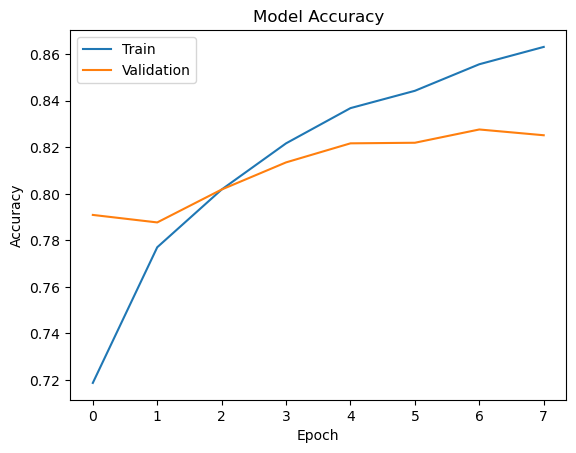

Fold 2
Epoch 1/10
63/63 [==============================] - 34s 431ms/step - loss: 0.5349 - accuracy: 0.7250 - val_loss: 0.4970 - val_accuracy: 0.7592
Epoch 2/10
63/63 [==============================] - 26s 420ms/step - loss: 0.4334 - accuracy: 0.7919 - val_loss: 0.4642 - val_accuracy: 0.7765
Epoch 3/10
63/63 [==============================] - 26s 416ms/step - loss: 0.4039 - accuracy: 0.8021 - val_loss: 0.4487 - val_accuracy: 0.7899
Epoch 4/10
63/63 [==============================] - 26s 415ms/step - loss: 0.3709 - accuracy: 0.8276 - val_loss: 0.4266 - val_accuracy: 0.8011
Epoch 5/10
63/63 [==============================] - 26s 417ms/step - loss: 0.3480 - accuracy: 0.8413 - val_loss: 0.4271 - val_accuracy: 0.8075
Epoch 6/10
63/63 [==============================] - 26s 421ms/step - loss: 0.3291 - accuracy: 0.8492 - val_loss: 0.4346 - val_accuracy: 0.8073
Epoch 7/10
63/63 [==============================] - 27s 426ms/step - loss: 0.3063 - accuracy: 0.8626 - val_loss: 0.4242 - val_accuracy:

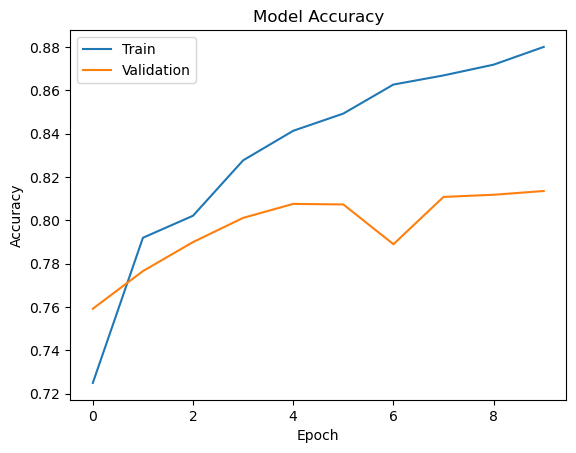

In [67]:
# Define K-Fold Cross-Validation with k=2.

k = 2
kf = KFold(n_splits=k, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')

    # Split the dataset into training and testing sets.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Define the LSTM model.
    
    model = Sequential()
    model.add(Embedding(10000, 100, input_length=100, weights=[embedd_mat]))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=64, epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [68]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 1,042,305
Non-trainable params: 0
_________________________________________________________________
None


### Evaluation

In [69]:
# Evaluate the model on the validation set
y_pred = (model.predict(X_test) >= 0.5).astype(int)
accuracy_val = accuracy_score(y_test, y_pred)
print(f"Validation accuracy: {accuracy_val}")

126/126 [==============================] - 6s 42ms/step
Validation accuracy: 0.8134920634920635


In [71]:
# Train acc
train_acc = history.history['accuracy'][-1]
print("Training accuracy:", train_acc) 

Training accuracy: 0.879960298538208


In [72]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy_test}")                            

126/126 [==============================] - 6s 44ms/step
Test accuracy: 0.8134920634920635


In [224]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1039
           1       0.87      0.74      0.80       977

    accuracy                           0.82      2016
   macro avg       0.83      0.82      0.82      2016
weighted avg       0.83      0.82      0.82      2016



### GRU Model

#### The GRU is similar to the LSTM (Long Short-Term Memory) architecture in that it also uses gating mechanisms to selectively update its internal state. However, the GRU has fewer parameters than the LSTM and is therefore faster to train and less prone to overfitting.

In [73]:
# Convert text to sequences and perform padding.
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Clean_Text'].values)
X = tokenizer.texts_to_sequences(df['Clean_Text'].values)
X = pad_sequences(X, maxlen=100)
y = df['Sentiment'].values

# Load the pre-trained Glove Embedding.
embeddings_index = {}
f = open(r'D:\glove.6B\glove.6B.100d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

# Create an embedding matrix.
embedd_mat = np.zeros((10000, 100))
for word, index in tokenizer.word_index.items():
    if index > 10000 - 1:
        break
    else:
        embedd_vect = embeddings_index.get(word)
        if embedd_vect is not None:
            embedd_mat[index] = embedd_vect


In [75]:
# Apply SMOTE to balance the classes.
smote = SMOTE()
X, y = smote.fit_resample(X, y)

Fold 1
Epoch 1/10
84/84 [==============================] - 32s 289ms/step - loss: 0.5593 - accuracy: 0.7080 - val_loss: 0.4825 - val_accuracy: 0.7783
Epoch 2/10
84/84 [==============================] - 22s 268ms/step - loss: 0.4801 - accuracy: 0.7705 - val_loss: 0.4693 - val_accuracy: 0.7827
Epoch 3/10
84/84 [==============================] - 23s 279ms/step - loss: 0.4654 - accuracy: 0.7777 - val_loss: 0.4575 - val_accuracy: 0.7876
Epoch 4/10
84/84 [==============================] - 22s 264ms/step - loss: 0.4575 - accuracy: 0.7796 - val_loss: 0.4534 - val_accuracy: 0.7850
Epoch 5/10
84/84 [==============================] - 22s 264ms/step - loss: 0.4493 - accuracy: 0.7809 - val_loss: 0.4484 - val_accuracy: 0.7861
Epoch 6/10
84/84 [==============================] - 23s 269ms/step - loss: 0.4376 - accuracy: 0.7928 - val_loss: 0.4457 - val_accuracy: 0.7887
Epoch 7/10
84/84 [==============================] - 22s 264ms/step - loss: 0.4401 - accuracy: 0.7907 - val_loss: 0.4419 - val_accuracy:

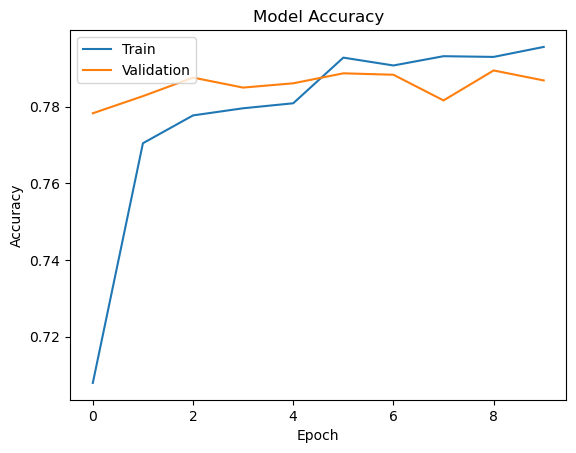

Fold 2
Epoch 1/10
84/84 [==============================] - 30s 282ms/step - loss: 0.5467 - accuracy: 0.7134 - val_loss: 0.4779 - val_accuracy: 0.7701
Epoch 2/10
84/84 [==============================] - 22s 265ms/step - loss: 0.4769 - accuracy: 0.7703 - val_loss: 0.4633 - val_accuracy: 0.7853
Epoch 3/10
84/84 [==============================] - 23s 271ms/step - loss: 0.4627 - accuracy: 0.7727 - val_loss: 0.4527 - val_accuracy: 0.7917
Epoch 4/10
84/84 [==============================] - 23s 276ms/step - loss: 0.4576 - accuracy: 0.7785 - val_loss: 0.4493 - val_accuracy: 0.7932
Epoch 5/10
84/84 [==============================] - 23s 273ms/step - loss: 0.4496 - accuracy: 0.7772 - val_loss: 0.4460 - val_accuracy: 0.7924
Epoch 6/10
84/84 [==============================] - 24s 282ms/step - loss: 0.4468 - accuracy: 0.7801 - val_loss: 0.4396 - val_accuracy: 0.7928
Epoch 7/10
84/84 [==============================] - 22s 268ms/step - loss: 0.4418 - accuracy: 0.7848 - val_loss: 0.4416 - val_accuracy:

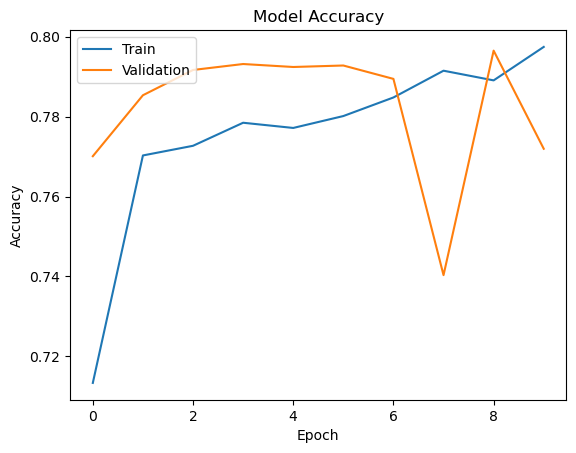

Fold 3
Epoch 1/10
84/84 [==============================] - 71s 295ms/step - loss: 0.5505 - accuracy: 0.7085 - val_loss: 0.5004 - val_accuracy: 0.7396
Epoch 2/10
84/84 [==============================] - 23s 274ms/step - loss: 0.4720 - accuracy: 0.7747 - val_loss: 0.4682 - val_accuracy: 0.7764
Epoch 3/10
84/84 [==============================] - 23s 275ms/step - loss: 0.4598 - accuracy: 0.7807 - val_loss: 0.4634 - val_accuracy: 0.7783
Epoch 4/10
84/84 [==============================] - 23s 276ms/step - loss: 0.4505 - accuracy: 0.7855 - val_loss: 0.4564 - val_accuracy: 0.7820
Epoch 5/10
84/84 [==============================] - 24s 283ms/step - loss: 0.4445 - accuracy: 0.7904 - val_loss: 0.4636 - val_accuracy: 0.7786
Epoch 6/10
84/84 [==============================] - 23s 279ms/step - loss: 0.4396 - accuracy: 0.7906 - val_loss: 0.4555 - val_accuracy: 0.7824
Epoch 7/10
84/84 [==============================] - 24s 280ms/step - loss: 0.4390 - accuracy: 0.7917 - val_loss: 0.4534 - val_accuracy:

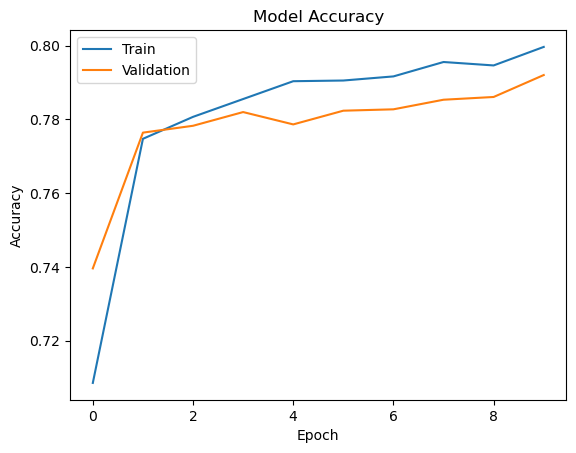

In [76]:
# Define K-Fold Cross-Validation with k=3
k = 3
kf = KFold(n_splits=k, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')

    # Split the dataset into training and testing sets.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Define the GRU model.
    model2 = Sequential()
    model2.add(Embedding(10000, 100, input_length=100, weights=[embedd_mat], trainable=False))
    model2.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model2.fit(X_train, y_train, batch_size=64, epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [77]:
print(model2.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 gru_6 (GRU)                 (None, 64)                31872     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,031,937
Trainable params: 31,937
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [78]:
# Evaluate the model on the validation set
y_pred = (model2.predict(X_test) >= 0.5).astype(int)
accuracy_val = accuracy_score(y_test, y_pred)
print(f"Validation accuracy: {accuracy_val}")

84/84 [==============================] - 4s 36ms/step
Validation accuracy: 0.7920386904761905


In [79]:
# Train acc
train_acc = history.history['accuracy'][-1]
print("Training accuracy:", train_acc) 

Training accuracy: 0.7996651530265808


In [80]:
# Evaluate the model on the test set
y_pred = (model2.predict(X_test) >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy_test}")                            

84/84 [==============================] - 3s 37ms/step
Test accuracy: 0.7920386904761905


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1359
           1       0.88      0.67      0.76      1329

    accuracy                           0.79      2688
   macro avg       0.81      0.79      0.79      2688
weighted avg       0.81      0.79      0.79      2688



# Bi-Directional LSTM

In [57]:
from tensorflow.keras.layers import Embedding, LSTM,GRU,Dense,Bidirectional


In [58]:
# Convert text to sequences and perform padding.
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Clean_Text'].values)
X = tokenizer.texts_to_sequences(df['Clean_Text'].values)
X = pad_sequences(X, maxlen=100)
y = df['Sentiment'].values

# Load the pre-trained Glove Embedding.
embeddings_index = {}
f = open(r'D:\glove.6B\glove.6B.100d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()



In [59]:
# creating an embedded matrix
embedd_mat = np.zeros((10000, 100))
for word, index in tokenizer.word_index.items():
    if index > 10000 - 1:
        break
    else:
        embedd_vect = embeddings_index.get(word)
        if embedd_vect is not None:
            embedd_mat[index] = embedd_vect


In [60]:
# Apply SMOTE to balance the classes.
smote = SMOTE()
X, y = smote.fit_resample(X, y)


Fold 1
Epoch 1/10
63/63 [==============================] - 66s 873ms/step - loss: 0.5677 - accuracy: 0.6880 - val_loss: 0.5173 - val_accuracy: 0.7440
Epoch 2/10
63/63 [==============================] - 53s 848ms/step - loss: 0.4929 - accuracy: 0.7567 - val_loss: 0.4776 - val_accuracy: 0.7711
Epoch 3/10
63/63 [==============================] - 53s 844ms/step - loss: 0.4711 - accuracy: 0.7741 - val_loss: 0.4513 - val_accuracy: 0.7857
Epoch 4/10
63/63 [==============================] - 56s 898ms/step - loss: 0.4586 - accuracy: 0.7793 - val_loss: 0.4465 - val_accuracy: 0.7887
Epoch 5/10
63/63 [==============================] - 55s 881ms/step - loss: 0.4519 - accuracy: 0.7827 - val_loss: 0.4377 - val_accuracy: 0.7909
Epoch 6/10
63/63 [==============================] - 54s 852ms/step - loss: 0.4412 - accuracy: 0.7904 - val_loss: 0.4396 - val_accuracy: 0.7937
Epoch 7/10
63/63 [==============================] - 53s 850ms/step - loss: 0.4365 - accuracy: 0.7912 - val_loss: 0.4369 - val_accuracy:

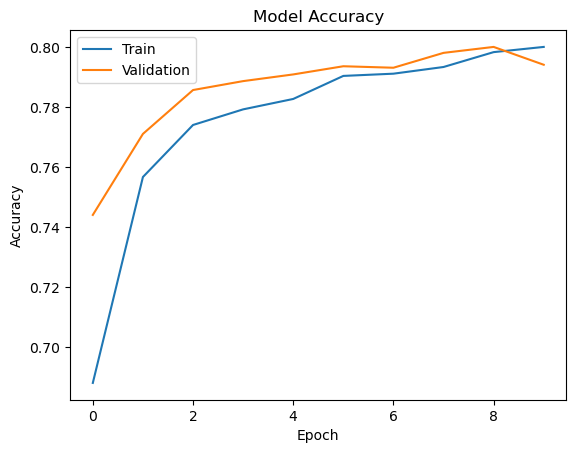

Fold 2
Epoch 1/10
63/63 [==============================] - 71s 941ms/step - loss: 0.5603 - accuracy: 0.7051 - val_loss: 0.4982 - val_accuracy: 0.7716
Epoch 2/10
63/63 [==============================] - 55s 876ms/step - loss: 0.4767 - accuracy: 0.7708 - val_loss: 0.4738 - val_accuracy: 0.7763
Epoch 3/10
63/63 [==============================] - 53s 846ms/step - loss: 0.4602 - accuracy: 0.7870 - val_loss: 0.4627 - val_accuracy: 0.7812
Epoch 4/10
63/63 [==============================] - 55s 879ms/step - loss: 0.4439 - accuracy: 0.7924 - val_loss: 0.4743 - val_accuracy: 0.7755
Epoch 5/10
63/63 [==============================] - 55s 879ms/step - loss: 0.4327 - accuracy: 0.7981 - val_loss: 0.4541 - val_accuracy: 0.7852
Epoch 6/10
63/63 [==============================] - 56s 887ms/step - loss: 0.4251 - accuracy: 0.8008 - val_loss: 0.4721 - val_accuracy: 0.7790
Epoch 7/10
63/63 [==============================] - 55s 874ms/step - loss: 0.4215 - accuracy: 0.8046 - val_loss: 0.4569 - val_accuracy:

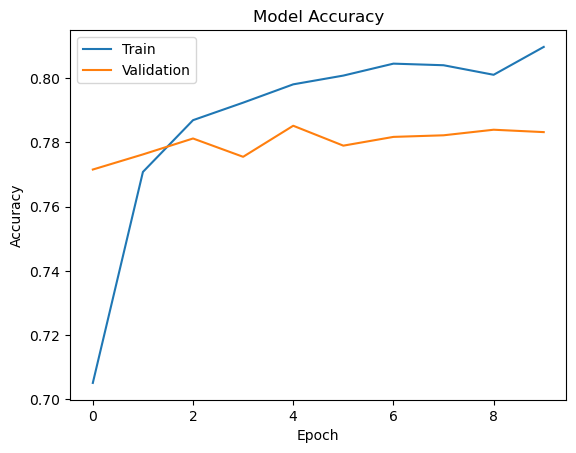

In [61]:
# Define K-Fold Cross-Validation with k=2
k = 2
kf = KFold(n_splits=k, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')

    # Split the dataset into training and testing sets.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Define the GRU model.
    model3 = Sequential()
    model3.add(Embedding(10000, 100, input_length=100, weights=[embedd_mat], trainable=False))
    model3.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model3.add(Dense(1, activation='sigmoid'))
    model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model3.fit(X_train, y_train, batch_size=64, epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [62]:
print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,084,609
Trainable params: 84,609
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [63]:
# Evaluate the model on the validation set
y_pred = (model3.predict(X_test) >= 0.5).astype(int)
accuracy_val = accuracy_score(y_test, y_pred)
print(f"Validation accuracy: {accuracy_val}")

126/126 [==============================] - 19s 94ms/step
Validation accuracy: 0.783234126984127


In [64]:
# Train acc
train_acc = history.history['accuracy'][-1]
print("Training accuracy:", train_acc) 

Training accuracy: 0.8097718358039856


In [65]:
# Evaluate the model on the test set
y_pred = (model3.predict(X_test) >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy_test}")                            

126/126 [==============================] - 12s 99ms/step
Test accuracy: 0.783234126984127


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      1991
           1       0.88      0.67      0.76      2041

    accuracy                           0.78      4032
   macro avg       0.80      0.78      0.78      4032
weighted avg       0.80      0.78      0.78      4032



# Result

In [90]:
result= pd.DataFrame({'Model':['LSTM','GRU','Bidirectional_LSTM'],
                     "Validation_Accuracy":[.8131,.7936,.7832],
                     'Training_Accuracy':[.8743,.79,.8098],
                     'Test_Accuracy':[.8131,.79,.7832],
                     'f1_score':[.82,.81,.78]})
result

Model  Validation_Accuracy  Training_Accuracy  Test_Accuracy  \
0                LSTM               0.8131             0.8743         0.8131   
1                 GRU               0.7936             0.7900         0.7900   
2  Bidirectional_LSTM               0.7832             0.8098         0.7832   

   f1_score  
0      0.82  
1      0.81  
2      0.78

### Conclusion:

From our Models we can conclude that LSTM with Glove Embedding is performing the best among others
with the accuracy score of 81.49.

# Predictive system

In [82]:
def predict_sentiment(x:str):
    x=tokenizer.texts_to_sequences([x])
    x=pad_sequences(x,maxlen=100)
    y_pred=(model.predict(x)>=0.5).astype(int)
    if y_pred==0:
        print('Negative Sentiment')
    else:
        print('Positive Sentiment')

In [83]:
predict_sentiment('this is bad')

1/1 [==============================] - 1s 1s/step
Negative Sentiment


In [84]:
predict_sentiment('this is ugly')

1/1 [==============================] - 0s 69ms/step
Negative Sentiment


In [89]:
predict_sentiment('amazing product')

1/1 [==============================] - 0s 65ms/step
Positive Sentiment


In [91]:
predict_sentiment("this product is bad")

1/1 [==============================] - 0s 233ms/step
Negative Sentiment


In [92]:
predict_sentiment('i am happy to buy this')

1/1 [==============================] - 0s 222ms/step
Positive Sentiment
